<a href="https://colab.research.google.com/github/Sidhartht1607/flight-delay-risk-system/blob/main/flight_data_set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ✈️ Flight Delay Analytics & Prediction (Q1 2025)

### Goal
Build a machine learning model to predict whether a flight will be delayed (≥15 minutes) using U.S. DOT flight data for January–March 2025. Alongside prediction, uncover operational patterns, root causes of delays, and propose data-driven recommendations for airline performance optimization.

### Key Business Questions
1. Which airports, routes, and carriers show highest disruption risk?
2. What operational and scheduling factors most contribute to delays?
3. Can we predict flight delay risk ahead of departure time?
4. What recurring patterns exist in Q1 flight delay trends?
5. Which changes could improve on-time performance?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_jan=pd.read_csv("flight_jan.csv")

## Importing data from Bureau of Transportation Statistics

In [3]:
df_jan.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [4]:
df_feb=pd.read_csv("flight_feb.csv")
df_feb.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [5]:
df_mar=pd.read_csv("flight_mar.csv")
df_mar.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [6]:
print(set(df_jan.columns) - set(df_feb.columns))
print(set(df_feb.columns) - set(df_jan.columns))
print(set(df_jan.columns) - set(df_mar.columns))
print(set(df_mar.columns) - set(df_jan.columns))

set()
set()
set()
set()


In [7]:
df_jan['FL_DATE'].describe()

,FL_DATE
count,539747
unique,31
top,1/5/2025 12:00:00 AM
freq,19676


Let join all the tables

In [8]:
df = pd.concat([df_jan,df_feb,df_mar],ignore_index=True)

In [9]:
df['FL_DATE'].max(),df['FL_DATE'].min()

('3/9/2025 12:00:00 AM', '1/1/2025 12:00:00 AM')

In [10]:
df_jan['DAY_OF_MONTH'].max(),df_feb['DAY_OF_MONTH'].max(),df_mar['DAY_OF_MONTH'].max()

(31, 28, 31)

In [11]:
df['FL_DATE']=pd.to_datetime(df['FL_DATE'])

/tmp/ipython-input-2801850585.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FL_DATE']=pd.to_datetime(df['FL_DATE'])


In [12]:
df['FL_DATE'].max(), df['FL_DATE'].min()


(Timestamp('2025-03-31 00:00:00'), Timestamp('2025-01-01 00:00:00'))

### Sanity checks





In [13]:
df['MONTH'].value_counts()

,count
MONTH,
3,600872
1,539747
2,504884


In [14]:
df.FL_DATE.dtype #object type

dtype('<M8[ns]')

In [15]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_NM', 'DEST', 'DEST_CITY_NAME',
       'DEST_STATE_ABR', 'DEST_STATE_NM', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP',
       'DEP_TIME_BLK', 'TAXI_OUT', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS',
       'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY', 'WEATHER_DELAY',
       'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'],
      dtype='object')

In [16]:
df = df.rename(columns={"DAY_OF_MONTH": "DAY"})

In [17]:
df.columns = df.columns.str.lower()

In [18]:
df.columns

Index(['year', 'quarter', 'month', 'day', 'fl_date', 'op_unique_carrier',
       'op_carrier', 'origin', 'origin_city_name', 'origin_state_abr',
       'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_abr',
       'dest_state_nm', 'crs_dep_time', 'dep_time', 'dep_delay',
       'dep_delay_new', 'dep_del15', 'dep_delay_group', 'dep_time_blk',
       'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'arr_delay_new', 'arr_del15', 'arr_delay_group', 'arr_time_blk',
       'cancelled', 'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'distance_group', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [19]:
df["flight_date"] = pd.to_datetime(
    df[["year", "month", "day"]]
)

In [20]:
df.groupby("month")['day'].max()

,day
month,
1,31
2,28
3,31


In [21]:
df.columns

Index(['year', 'quarter', 'month', 'day', 'fl_date', 'op_unique_carrier',
       'op_carrier', 'origin', 'origin_city_name', 'origin_state_abr',
       'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_abr',
       'dest_state_nm', 'crs_dep_time', 'dep_time', 'dep_delay',
       'dep_delay_new', 'dep_del15', 'dep_delay_group', 'dep_time_blk',
       'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'arr_delay_new', 'arr_del15', 'arr_delay_group', 'arr_time_blk',
       'cancelled', 'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'distance_group', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'flight_date'],
      dtype='object')

In [22]:
df.drop(columns=["fl_date"], inplace=True)

### 1. Delay characterizations


### Donut function

In [23]:
#piechart function
def plot_donut(data,cols=['r','b'],explode=(0.05,0.1),labels=['not_cancelled','cancelled'], title=''):
  plt.pie(data, colors=cols, labels=labels,
          autopct='%1.1f%%', pctdistance=0.85,
          explode=explode)

  # draw circle
  centre_circle = plt.Circle((0, 0), 0.70, fc='white')
  fig = plt.gcf()

  # Adding Circle in Pie chart
  fig.gca().add_artist(centre_circle)

  # Adding Title of chart
  plt.title(title)

  # Displaying Chart
  plt.show()

Cancelled flights percentage

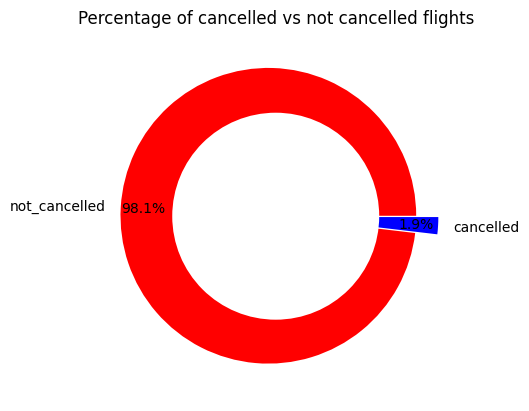

In [24]:
cancelled_flights = df['cancelled'].mean() * 100
not_cancelled_flights = 100 - cancelled_flights
not_cancelled_flights, cancelled_flights

plot_donut([not_cancelled_flights,cancelled_flights],title="Percentage of cancelled vs not cancelled flights")

We checked the number of flights that are cancelled because we might get a lot missing values because the cancelled flights are there. Lets check diverted flights as well

Diverted_flights percentage

99.76803445511798 0.23196554488202087


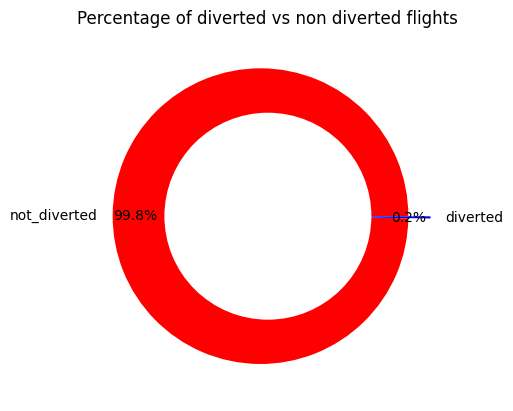

In [25]:
diverted_flights=df['diverted'].mean()*100
not_diverted_flights = 100 - diverted_flights
print(not_diverted_flights, diverted_flights)

plot_donut(data=[not_diverted_flights,diverted_flights],labels=['not_diverted','diverted'],title="Percentage of diverted vs non diverted flights")

Lets check how these cancelled flights are affecting other columns. I suspect the data would be null.

In [26]:
print("cancelled_total",len(df[df['cancelled']==1])) ## there are about 30640 cancelled flight in 3 months
df_cancelled=df[df['cancelled']==1]

cancelled_total 30640


In [27]:
df_1=df[(df['dep_del15'].isna()) & (df['cancelled']==1)]
print("number of late departures by 15 mins: ",len(df_1))

number of late departures by 15 mins:  29671


Here it shows that there are about 29671 flights that have not departed which makes sense but the problem is that this should be the same as the number of cancelled flights. We can assume that the the flight had departed and then got cancelled.

	•	DEP_TIME confirms whether departure was initiated
	•	DEP_DELAY quantifies how late that initiation occurred
	•	TAXI_OUT shows whether the aircraft progressed beyond gate departure

In [28]:
print("cancelled_total",len(df[df['cancelled']==1])) ## there are about 30640 cancelled flight in 3 months
df_cancelled=df[df['cancelled']==1]
df_1=df[(df['dep_del15'].isna()) & (df['cancelled']==1)]
print("number of late departures by 15 mins and cancelled: ",len(df_1))
print("dep_delay cancelled and deptime15 is na: ",df_1['dep_delay'].isna().sum())
print("dep_time cancelled and deptime15 is na: ",df_1['dep_time'].isna().sum())
print("taxi_out cancelled and deptime15 is na: ",df_1['taxi_out'].isna().sum())
print("dep_delay and cancelled: ",df_cancelled['dep_delay'].isna().sum())
print("dep_time and cancelled: ",df_cancelled['dep_time'].isna().sum())
print("taxi_out_cancelled: ",df_cancelled['taxi_out'].isna().sum())

cancelled_total 30640
number of late departures by 15 mins and cancelled:  29671
dep_delay cancelled and deptime15 is na:  29671
dep_time cancelled and deptime15 is na:  29560
taxi_out cancelled and deptime15 is na:  29671
dep_delay and cancelled:  29671
dep_time and cancelled:  29560
taxi_out_cancelled:  30401


In [29]:
#Number of flights where the departure began but got cancelled:
print("Number of flights where the taxing began but got cancelled",len(df[df['cancelled']==1])-df_cancelled['taxi_out'].isna().sum())
print("Number of flights where the departure from gate began but got cancelled",len(df[df['cancelled']==1])-df_cancelled['dep_time'].isna().sum())
print("Number of flights where the departure from gate was delayed but got cancelled",len(df[df['cancelled']==1])-df_cancelled['dep_delay'].isna().sum())

Number of flights where the taxing began but got cancelled 239
Number of flights where the departure from gate began but got cancelled 1080
Number of flights where the departure from gate was delayed but got cancelled 969


Because the delay events are not measured normally when the flights have been cancelled itself we will remove them for now. It can happen to any number of factors for example weather problems or operation/technical discrepencies

In [30]:
(df['dep_del15'].isna()).sum()

np.int64(29671)

In [31]:
len(df[(df['dep_del15'].isna()) & (df['cancelled']==1)])

29671

 What percentage of flights are delayed at departure?

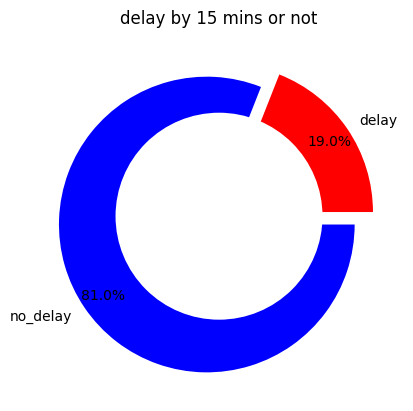

In [32]:
delay_rate = df['dep_del15'].mean() * 100
on_time_rate = 100 - delay_rate

data=delay_rate, on_time_rate
plot_donut(data,labels=["delay","no_delay"],title="delay by 15 mins or not")

In [33]:
df_flight_unique=df_cancelled.groupby(['flight_date'])['cancelled'].sum()

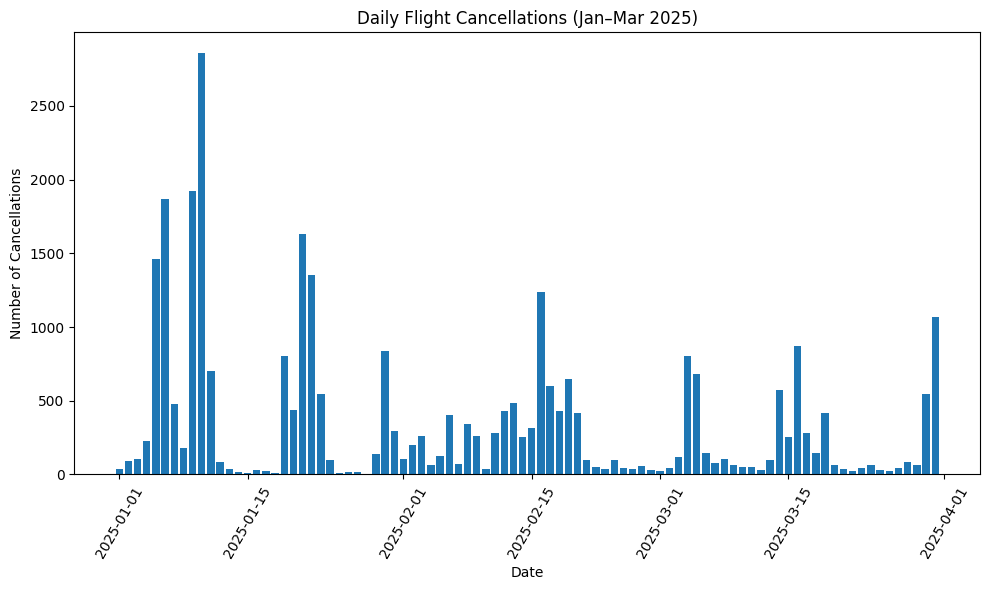

In [34]:
plt.figure(figsize=(10,6))
plt.bar(df_flight_unique.sort_index().index,df_flight_unique.values)
plt.title("Daily Flight Cancellations (Jan–Mar 2025)")
plt.xlabel("Date")
plt.ylabel("Number of Cancellations")
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

This shows that there are more cancellations at the beginning of the year. Maybe because people are getting back from holidays and the bad weather conditions during those times.

In [35]:
df_cancelled['origin'].value_counts()

,count
origin,
DFW,2751
DCA,2187
CLT,1519
ATL,1515
ORD,852
...,...
LCK,1
LSE,1
INL,1


In [36]:
df_most_can_org=df_cancelled.groupby(["flight_date",'origin'])['cancelled'].count()
df_most_can_org=df_most_can_org.reset_index(name='num_cancelled')
max_cancel_per_day=df_most_can_org.sort_values(by=['flight_date','num_cancelled'],ascending=[True,False]).groupby("flight_date").first()
max_cancel_per_day

,origin,num_cancelled
flight_date,,
2025-01-01,DEN,6
2025-01-02,SAN,17
2025-01-03,SAN,30
2025-01-04,DEN,39
2025-01-05,DFW,196
...,...,...
2025-03-27,HNL,8
2025-03-28,HRL,14
2025-03-29,HRL,13


In [37]:
max_cancel_per_day['perc_of_daily_cxl'] = (
    max_cancel_per_day['num_cancelled'] /
    df_cancelled.groupby('flight_date')['cancelled'].count()
) * 100

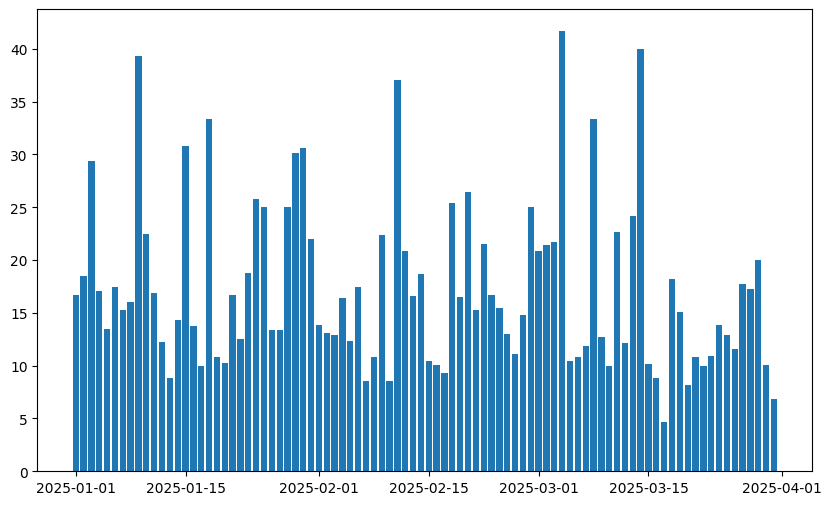

In [38]:
plt.figure(figsize=(10,6))
plt.bar(max_cancel_per_day.index,max_cancel_per_day['perc_of_daily_cxl'])
plt.show()

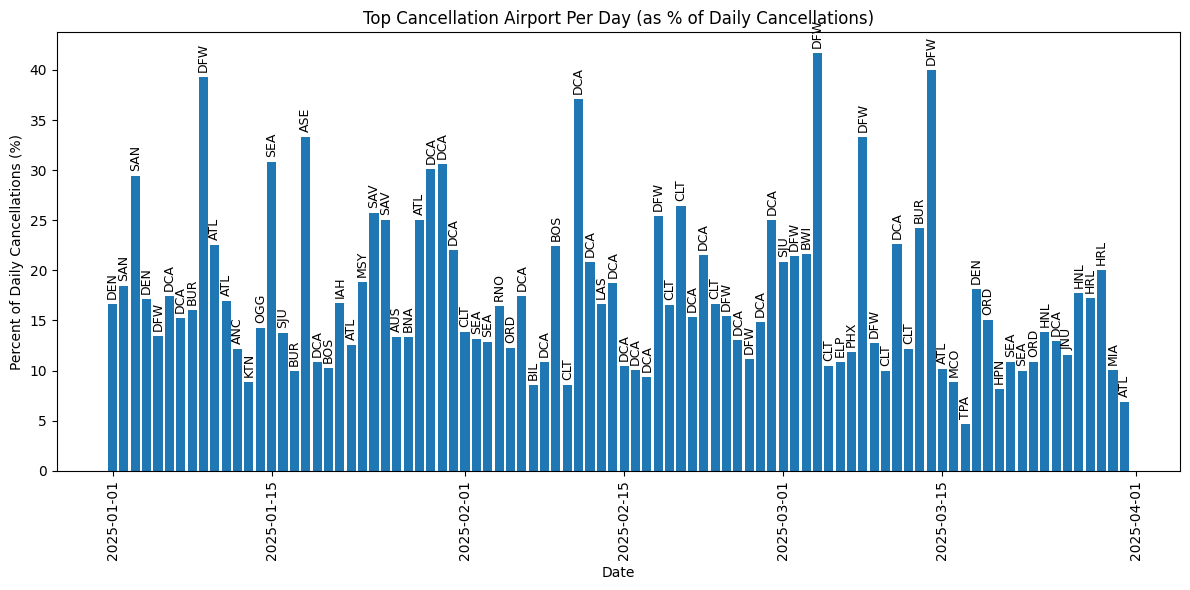

In [39]:
plt.figure(figsize=(12,6))
bars = plt.bar(
    max_cancel_per_day.index,
    max_cancel_per_day['perc_of_daily_cxl']
)

# Add text labels for origin
for bar, label in zip(bars, max_cancel_per_day['origin']):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.5,
        label,
        ha='center',
        va='bottom',
        fontsize=9,
        rotation=90
    )

plt.title("Top Cancellation Airport Per Day (as % of Daily Cancellations)")
plt.ylabel("Percent of Daily Cancellations (%)")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

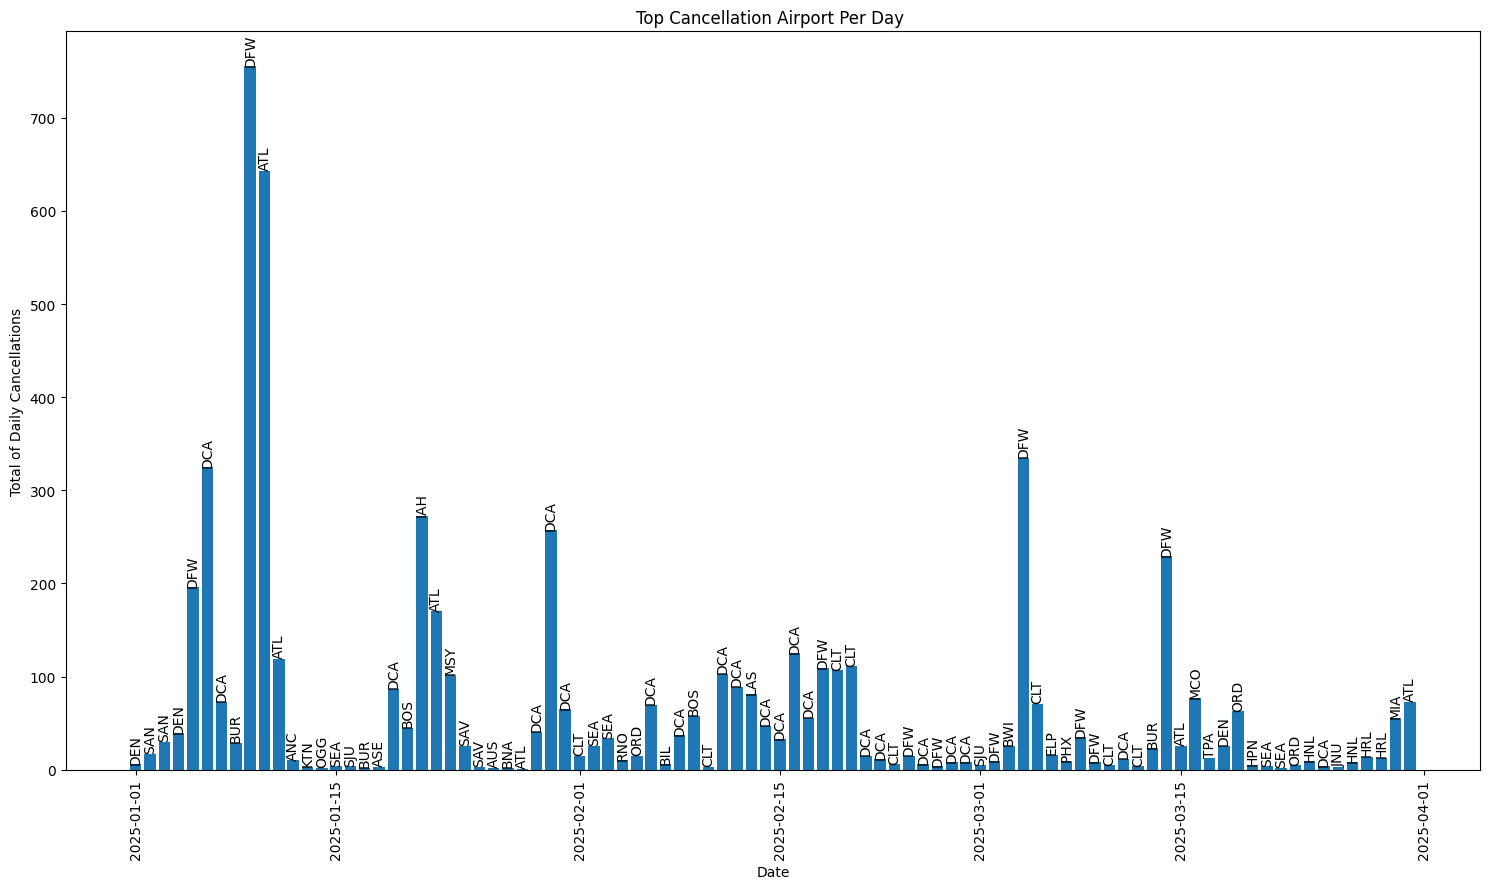

In [40]:
plt.figure(figsize=(15,9))
bar=plt.bar(max_cancel_per_day.index,max_cancel_per_day.num_cancelled)
for i in range(len(bar)):
  height=bar[i].get_height()
  plt.text(
      bar[i].get_x()+bar[i].get_width()/2,
      height+0.5,
      max_cancel_per_day.origin.iloc[i],
      ha="center",
      va="bottom",
      fontsize=10,
      rotation=90
  )
plt.title("Top Cancellation Airport Per Day ")
plt.ylabel("Total of Daily Cancellations")
plt.xlabel("Date")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Lets remove the cancelled and diverted flights from our dataset

In [41]:
len(df)

1645503

In [42]:
df_operation=df[(df['cancelled']!=1)& (df['diverted']!=1)]

In [43]:
op_del=df_operation[df_operation['dep_del15']==1].op_carrier.value_counts()
op_del

,count
op_carrier,
WN,60924
AA,44133
DL,43598
OO,36370
UA,30434
OH,15055
B6,13263
F9,11482
YX,10986


In [44]:
df.op_carrier.unique()

array(['AA', 'AS', 'B6', 'DL', 'F9', 'G4', 'HA', 'MQ', 'NK', 'OH', 'OO',
       'UA', 'WN', 'YX'], dtype=object)

In [45]:
op_del['AA'],df_operation.op_carrier.value_counts()['AA']

(np.int64(44133), np.int64(221933))

In [46]:
# 1. Keep only operational flights (no cancelled, no diverted)
df_operation = df[(df['cancelled'] != 1) & (df['diverted'] != 1)].copy()

# 2. Optionally drop rows with missing carrier codes (avoids NaN issues)
df_operation = df_operation[~df_operation['op_carrier'].isna()]

# 3. Delayed flights per carrier (numerator)
op_del = df_operation[df_operation['dep_del15'] == 1]['op_carrier'].value_counts()

# 4. Total flights per carrier (denominator)
p = df_operation['op_carrier'].value_counts()

# 5. Loop over carriers that actually have operational flights
for carrier in p.index:
    delayed = op_del.get(carrier, 0)   # 0 if this carrier has no delayed flights
    rate = delayed / p[carrier] * 100  # percentage
    print(carrier, rate)

WN 18.876880747589418
DL 19.043167950101118
AA 19.885731279259957
OO 19.01788842350751
UA 16.48342125502345
YX 13.795095244672703
MQ 16.443342642859385
OH 26.110860591765235
B6 23.780750197231587
NK 18.49554828399665
AS 17.646610814927648
F9 23.551854282901214
G4 22.98277711185414
HA 13.288569643972517


Which airports are causing the most departure delays?

In [47]:
p=df_operation.groupby(['origin'])['dep_del15'].sum().sort_values(ascending=False)
total=df_operation.groupby('origin')['origin'].count()
delay_rates = (p / total[p.index] * 100).sort_values(ascending=False)
delay_rates.to_frame(name="delay_rate (%)")
delay_rates

,0
origin,
CKB,61.538462
HTS,51.666667
TOL,41.441441
HGR,41.379310
ASE,37.531486
...,...
PQI,4.494382
EKO,4.395604
ADK,4.347826


This shows that CKB has more delays. But it could also be because of less flights from there

To avoid misleading delay percentages at airports with very low flight volumes, we filtered out airports below the median total flight count. This removes airports whose limited operations inflate delay rates due to small sample sizes.

In [48]:
valid_airports = total[total > total.median()]

delay_rates_filtered = (p[valid_airports.index] / valid_airports) * 100
delay_rates_filtered.sort_values(ascending=False)

,0
origin,
ASE,37.531486
EGE,29.358238
EYW,28.737690
HDN,28.184282
PBI,27.356093
...,...
OGG,11.673092
JNU,10.251046
KOA,10.190114


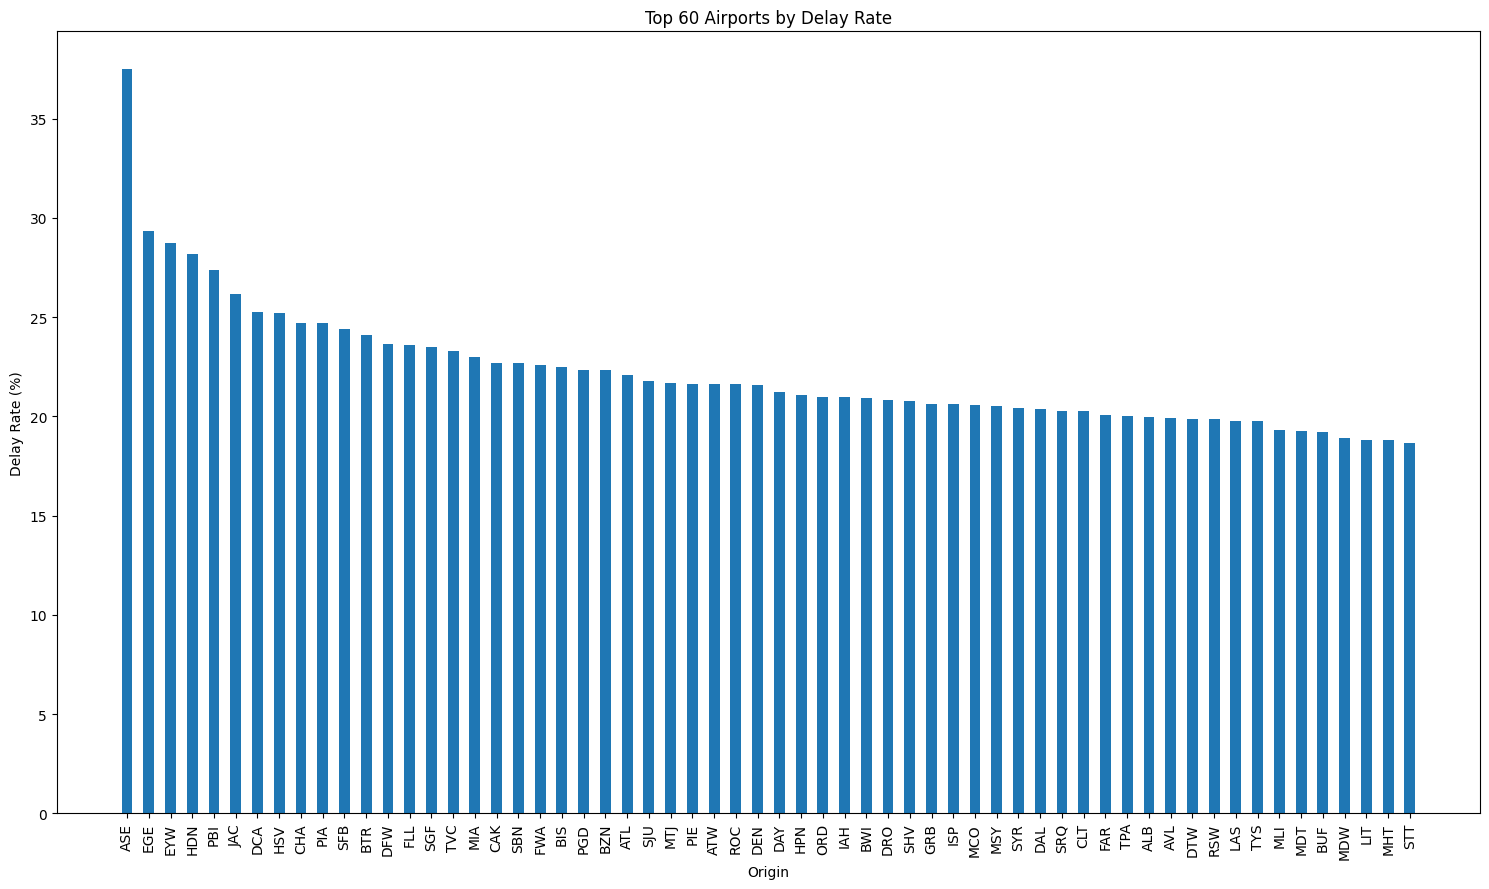

In [49]:
top_10=delay_rates_filtered.sort_values(ascending=False).head(60)
plt.figure(figsize=(15,9))
plt.bar(top_10.index,top_10.values,width=0.5)
plt.xlabel("Origin")
plt.ylabel("Delay Rate (%)")
plt.title("Top 60 Airports by Delay Rate")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Time-of-Day Delay Analysis

In [50]:
df_operation[['dep_time','arr_time']].head()

,dep_time,arr_time
0,452.0,733.0
1,552.0,832.0
2,815.0,1052.0
3,1029.0,1300.0
4,1707.0,2005.0


In [51]:
df_operation.columns

Index(['year', 'quarter', 'month', 'day', 'op_unique_carrier', 'op_carrier',
       'origin', 'origin_city_name', 'origin_state_abr', 'origin_state_nm',
       'dest', 'dest_city_name', 'dest_state_abr', 'dest_state_nm',
       'crs_dep_time', 'dep_time', 'dep_delay', 'dep_delay_new', 'dep_del15',
       'dep_delay_group', 'dep_time_blk', 'taxi_out', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'arr_delay_new', 'arr_del15',
       'arr_delay_group', 'arr_time_blk', 'cancelled', 'cancellation_code',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'flight_date'],
      dtype='object')

In [52]:
df_operation[['crs_dep_time','crs_arr_time']].head()

,crs_dep_time,crs_arr_time
0,500,754
1,555,849
2,820,1114
3,1032,1323
4,1700,1948


In [53]:
df_operation.crs_dep_time.max(), df_operation.crs_dep_time.min()

(2359, 1)

In [54]:
df_operation['hour']=(df_operation.crs_dep_time//100)
x=df_operation.groupby('hour')['dep_del15'].mean() *100

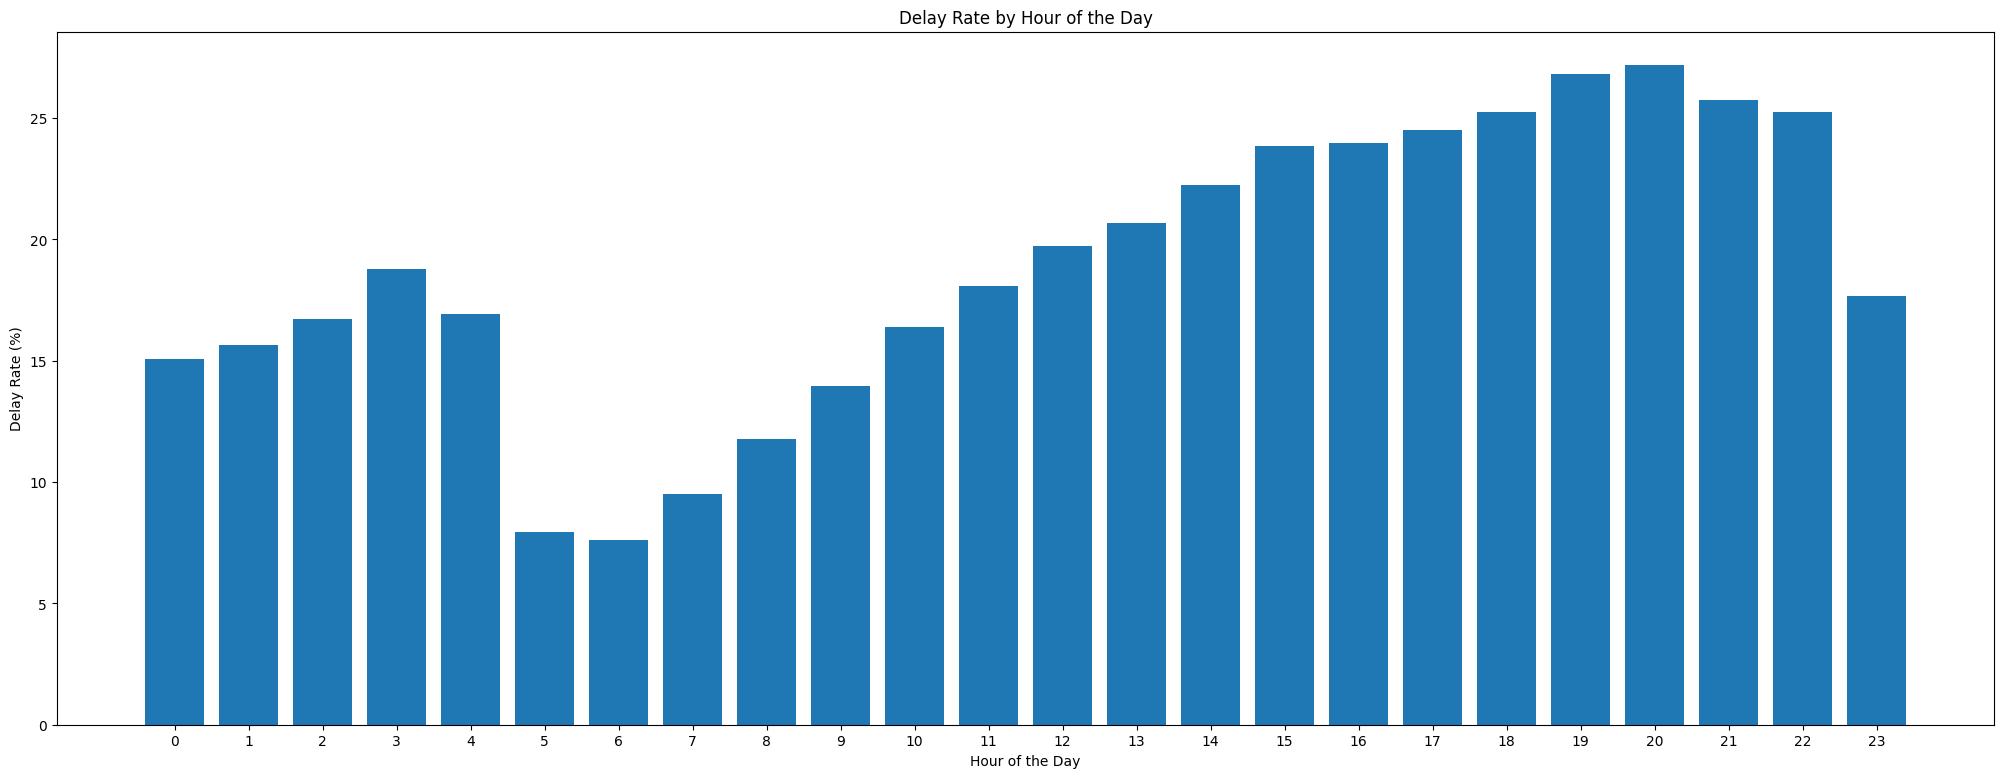

In [55]:
plt.figure(figsize=(25,9))
plt.bar(x.index,x.values)
plt.xticks(x.index)
plt.xlabel("Hour of the Day")
plt.ylabel("Delay Rate (%)")
plt.title("Delay Rate by Hour of the Day")
plt.show()

### Checking delay rates for top 10 airports

In [56]:
index=delay_rates_filtered.sort_values(ascending=False).head(15).index
org_delay_hour=df_operation.groupby(['origin','hour'])['dep_del15'].mean() *100
org_delay_hour=org_delay_hour.reset_index()
org_delay_hour=org_delay_hour[org_delay_hour['origin'].isin(index)]
pivot = org_delay_hour.pivot(index='hour', columns='origin', values='dep_del15')
pivot=pivot.dropna(how="all")
pivot

origin,ASE,BTR,CHA,DCA,DFW,EGE,EYW,FLL,HDN,HSV,JAC,PBI,PIA,SFB,SGF
hour,,,,,,,,,,,,,,,
5,NaN,3.571429,17.682927,4.296875,8.392315,NaN,NaN,7.509881,NaN,22.270742,NaN,5.263158,13.924051,0.000000,9.042553
6,NaN,9.677419,9.210526,8.083596,10.455487,NaN,NaN,4.801097,NaN,31.012658,NaN,6.801737,13.114754,8.454106,15.294118
7,17.224880,16.766467,19.310345,10.733366,12.439962,22.222222,20.000000,11.653985,15.909091,22.131148,15.934066,7.429421,NaN,6.214689,13.761468
8,27.027027,NaN,16.666667,14.506284,14.832077,18.320611,11.688312,11.111111,NaN,10.869565,17.647059,5.747126,9.090909,13.664596,15.725806
9,21.875000,20.454545,12.500000,20.469799,19.777503,42.857143,20.833333,13.615023,NaN,15.972222,NaN,11.034483,13.793103,10.204082,14.130435
10,24.305556,22.857143,18.421053,18.869337,19.604287,21.527778,15.294118,17.232376,0.000000,54.098361,12.307692,14.610390,29.126214,16.513761,16.901408
11,32.716049,NaN,21.621622,18.493852,25.029727,31.511254,20.000000,20.324629,25.438596,17.647059,24.691358,23.216308,22.580645,17.857143,23.333333
12,47.861507,12.500000,26.404494,24.315620,21.182098,31.331593,28.779070,24.843750,28.630705,0.000000,34.161491,28.181818,3.846154,33.703704,33.000000
13,49.014778,NaN,26.086957,25.797872,25.613778,27.634660,28.662420,27.204659,32.770270,36.283186,27.272727,35.384615,18.181818,28.378378,21.929825


In [57]:
#flight counts:
flights_per_bin = (
    df_operation.groupby(['origin','hour'])['dep_del15']
    .count()
    .reset_index()
)

pivot_counts = flights_per_bin.pivot(index='hour', columns='origin', values='dep_del15')

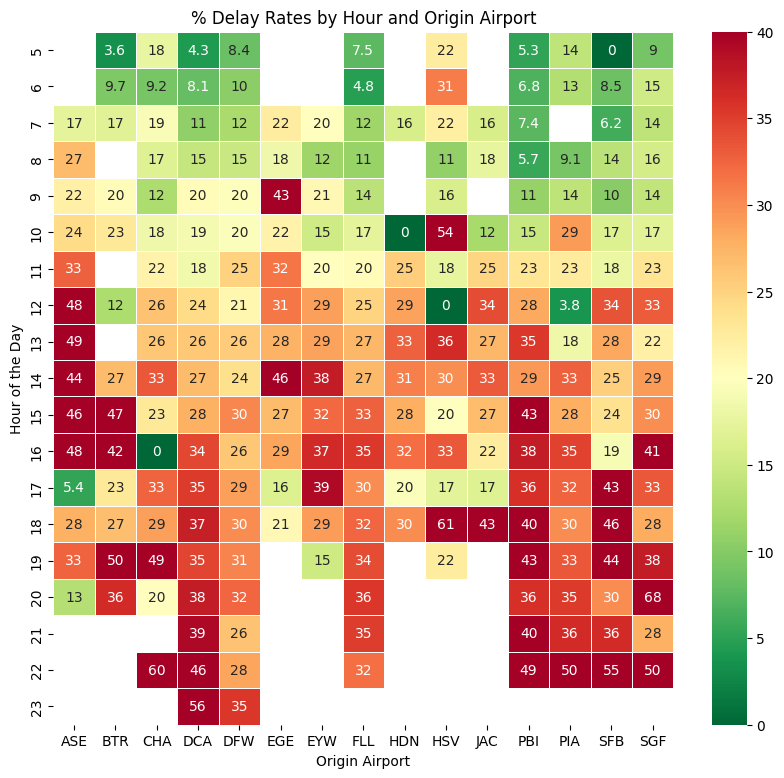

In [58]:

plt.figure(figsize=(10, 9))
sns.heatmap(
    pivot,
    cmap="RdYlGn_r",
    vmin=0,       # 0% delay rate
    vmax=40,      # ~40% realistically captures almost all spikes
    linewidths=0.5,
    annot=True
)
plt.title('% Delay Rates by Hour and Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Hour of the Day')
plt.show()

In [59]:
flight_counts = df_operation.groupby(['origin','hour']).size().reset_index(name='n')

mean_delay=df_operation.groupby(['origin','hour'])['dep_del15'].mean() *100
mean_delay=mean_delay.reset_index(name="delay_rate")
flight_counts[flight_counts['origin'].isin(index)]

,origin,hour,n
156,ASE,7,209
157,ASE,8,185
158,ASE,9,64
159,ASE,10,288
160,ASE,11,162
...,...,...,...
3303,SGF,18,82
3304,SGF,19,64
3305,SGF,20,22
3306,SGF,21,18


In [60]:
merged = mean_delay.merge(flight_counts, on=['origin','hour'], how='left')
merged['stderr'] = (merged['delay_rate']/100 * (1 - merged['delay_rate']/100) / merged['n']) ** 0.5
merged['margin'] = 1.96 * merged['stderr'] * 100 # convert back to %
merged['lower']  = merged['delay_rate'] - merged['margin']
merged['upper']  = merged['delay_rate'] + merged['margin']


In [61]:
merged

,origin,hour,delay_rate,n,stderr,margin,lower,upper
0,ABE,5,0.000000,2,0.000000,0.000000,0.000000,0.000000
1,ABE,6,6.870229,131,0.022100,4.331619,2.538610,11.201848
2,ABE,7,0.000000,30,0.000000,0.000000,0.000000,0.000000
3,ABE,8,4.494382,89,0.021961,4.304379,0.190003,8.798761
4,ABE,9,11.764706,34,0.055255,10.829997,0.934709,22.594702
...,...,...,...,...,...,...,...,...
3797,YUM,15,14.285714,63,0.044087,8.640988,5.644727,22.926702
3798,YUM,16,37.500000,24,0.098821,19.368951,18.131049,56.868951
3799,YUM,18,30.434783,23,0.095944,18.805000,11.629783,49.239782
3800,YUM,19,10.714286,28,0.058451,11.456439,-0.742154,22.170725


Most operational flight activity occurs between 05:00 and 22:00.
Overnight hours show near-zero or no departures, which aligns with runway curfews, crew scheduling constraints, and limited nighttime passenger demand.
Therefore, delay-risk analysis was focused on active operational hours only.

  1.	Delays are heavily concentrated in the late afternoon and evening
(15:00–23:00).Most airports shift from green/yellow in the morning to orange/red after 15:00, indicating cascading delays building up through the day.

2.	DFW, PIA, SFB and SGF show the most severe late-evening congestion.
Delay rates exceed 50–60% after 21:00–23:00 at these airports, meaning more than half of departures leave 15+ minutes late in those windows

3.	Early-morning departures (05:00–09:00) are generally low risk.
Across all airports, delay rates stay mostly below ~15% in the first few hours of the day, suggesting that starting flights early avoids the worst congestion.

4.	Midday (11:00–15:00) is a “transition zone” from punctual to congested operations.
Delay rates move from green/yellow to consistent orange, showing that bank waves and knock-on delays start accumulating from late morning onward.

5.	Some airports are structurally worse in the evening than others.
While all listed airports deteriorate later in the day, DFW, PBI, PIA, SFB, SGF stand out with sustained high delay rates across multiple evening hours, indicating potential schedule or capacity issues, not just random spikes.


In [62]:
merged

,origin,hour,delay_rate,n,stderr,margin,lower,upper
0,ABE,5,0.000000,2,0.000000,0.000000,0.000000,0.000000
1,ABE,6,6.870229,131,0.022100,4.331619,2.538610,11.201848
2,ABE,7,0.000000,30,0.000000,0.000000,0.000000,0.000000
3,ABE,8,4.494382,89,0.021961,4.304379,0.190003,8.798761
4,ABE,9,11.764706,34,0.055255,10.829997,0.934709,22.594702
...,...,...,...,...,...,...,...,...
3797,YUM,15,14.285714,63,0.044087,8.640988,5.644727,22.926702
3798,YUM,16,37.500000,24,0.098821,19.368951,18.131049,56.868951
3799,YUM,18,30.434783,23,0.095944,18.805000,11.629783,49.239782
3800,YUM,19,10.714286,28,0.058451,11.456439,-0.742154,22.170725


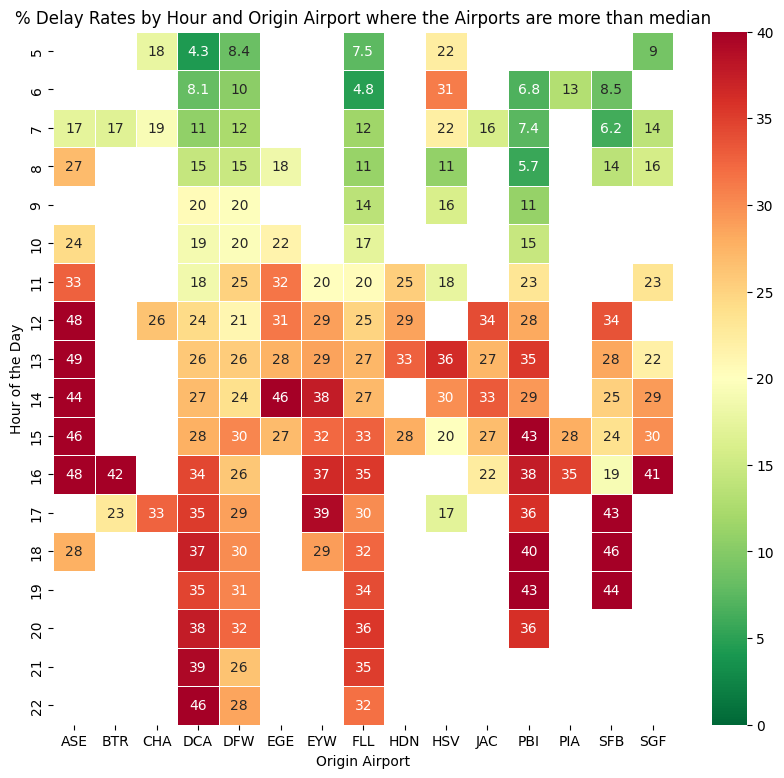

In [63]:
filtered_median=merged[merged['n']>=merged['n'].median()]
filtered=filtered_median[filtered_median['origin'].isin(index)]

plt.figure(figsize=(10, 9))
sns.heatmap(
    filtered.pivot(index='hour', columns='origin', values='delay_rate'),
    cmap="RdYlGn_r",
    vmin=0,       # 0% delay rate
    vmax=40,      # ~40% realistically captures almost all spikes
    linewidths=0.5,
    annot=True
)
plt.title('% Delay Rates by Hour and Origin Airport where the Airports are more than median')
plt.xlabel('Origin Airport')
plt.ylabel('Hour of the Day')
plt.show()

In [64]:
df_operation['hour'] = (df_operation['crs_dep_time'] // 100).astype(int)

In [65]:
grp = (df_operation.groupby(['origin', 'hour']).agg(n=('dep_del15', 'count'),k=('dep_del15', 'sum')).reset_index())
grp['delay_rate'] = grp['k'] / grp['n'] * 100

# proportion as a fraction
p = grp['k'] / grp['n']

# standard error of a proportion
grp['stderr'] = np.sqrt(p * (1 - p) / grp['n'])
grp[['origin', 'hour', 'n', 'delay_rate', 'stderr']].head()

z = 1.96  # 95% CI

grp['margin'] = z * grp['stderr'] * 100  # convert to percentage points

grp['lower'] = (grp['delay_rate'] - grp['margin']).clip(lower=0, upper=100)
grp['upper'] = (grp['delay_rate'] + grp['margin']).clip(lower=0, upper=100)

grp.head()

,origin,hour,n,k,delay_rate,stderr,margin,lower,upper
0,ABE,5,2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,ABE,6,131,9.0,6.870229,0.022100,4.331619,2.538610,11.201848
2,ABE,7,30,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,ABE,8,89,4.0,4.494382,0.021961,4.304379,0.190003,8.798761
4,ABE,9,34,4.0,11.764706,0.055255,10.829997,0.934709,22.594702


In [66]:
min_n = 100        # minimum flights to consider
max_margin = 7.0   # maximum acceptable CI half-width (in % points)

grp['valid'] = (grp['n'] >= min_n) & (grp['margin'] <= max_margin)

grp[['origin', 'hour', 'n', 'delay_rate', 'margin', 'valid']].head()
top_airports = delay_rates_filtered.sort_values(ascending=False).head(15).index
grp = grp[grp['origin'].isin(top_airports)].copy()

In [67]:
grp[grp['origin']=='DFW']

,origin,hour,n,k,delay_rate,stderr,margin,lower,upper,valid
938,DFW,5,989,83.0,8.392315,0.008817,1.728084,6.664232,10.120399,True
939,DFW,6,966,101.0,10.455487,0.009845,1.929564,8.525923,12.385050,True
940,DFW,7,4164,518.0,12.439962,0.005115,1.002451,11.437510,13.442413,True
941,DFW,8,7295,1082.0,14.832077,0.004161,0.815610,14.016467,15.647687,True
942,DFW,9,2427,480.0,19.777503,0.008085,1.584729,18.192774,21.362232,True
943,DFW,10,6065,1189.0,19.604287,0.005098,0.999154,18.605132,20.603441,True
944,DFW,11,3364,842.0,25.029727,0.007469,1.463864,23.565863,26.493590,True
945,DFW,12,5854,1240.0,21.182098,0.005340,1.046711,20.135387,22.228808,True
946,DFW,13,2729,699.0,25.613778,0.008356,1.637711,23.976067,27.251489,True
947,DFW,14,4891,1163.0,23.778368,0.006087,1.193129,22.585239,24.971497,True


In [68]:
# 1) Values – set delay_rate to NaN where invalid so heatmap blanks them
grp_for_values = grp.copy()

grp_for_values.loc[~grp_for_values['valid'], 'delay_rate'] = np.nan

pivot_values = grp_for_values.pivot(index='hour', columns='origin', values='delay_rate')

# 2) Labels – show CI + n only if valid, else empty
def make_label(row):
    if not row['valid']:
        return ""
    return f"{row['delay_rate']:.1f}% ±{row['margin']:.1f} (n={int(row['n'])})"

grp['label'] = grp.apply(make_label, axis=1)

pivot_labels = grp.pivot(index='hour', columns='origin', values='label')

In [69]:
grp[grp['origin']=='DFW']

,origin,hour,n,k,delay_rate,stderr,margin,lower,upper,valid,label
938,DFW,5,989,83.0,8.392315,0.008817,1.728084,6.664232,10.120399,True,8.4% ±1.7 (n=989)
939,DFW,6,966,101.0,10.455487,0.009845,1.929564,8.525923,12.385050,True,10.5% ±1.9 (n=966)
940,DFW,7,4164,518.0,12.439962,0.005115,1.002451,11.437510,13.442413,True,12.4% ±1.0 (n=4164)
941,DFW,8,7295,1082.0,14.832077,0.004161,0.815610,14.016467,15.647687,True,14.8% ±0.8 (n=7295)
942,DFW,9,2427,480.0,19.777503,0.008085,1.584729,18.192774,21.362232,True,19.8% ±1.6 (n=2427)
943,DFW,10,6065,1189.0,19.604287,0.005098,0.999154,18.605132,20.603441,True,19.6% ±1.0 (n=6065)
944,DFW,11,3364,842.0,25.029727,0.007469,1.463864,23.565863,26.493590,True,25.0% ±1.5 (n=3364)
945,DFW,12,5854,1240.0,21.182098,0.005340,1.046711,20.135387,22.228808,True,21.2% ±1.0 (n=5854)
946,DFW,13,2729,699.0,25.613778,0.008356,1.637711,23.976067,27.251489,True,25.6% ±1.6 (n=2729)
947,DFW,14,4891,1163.0,23.778368,0.006087,1.193129,22.585239,24.971497,True,23.8% ±1.2 (n=4891)


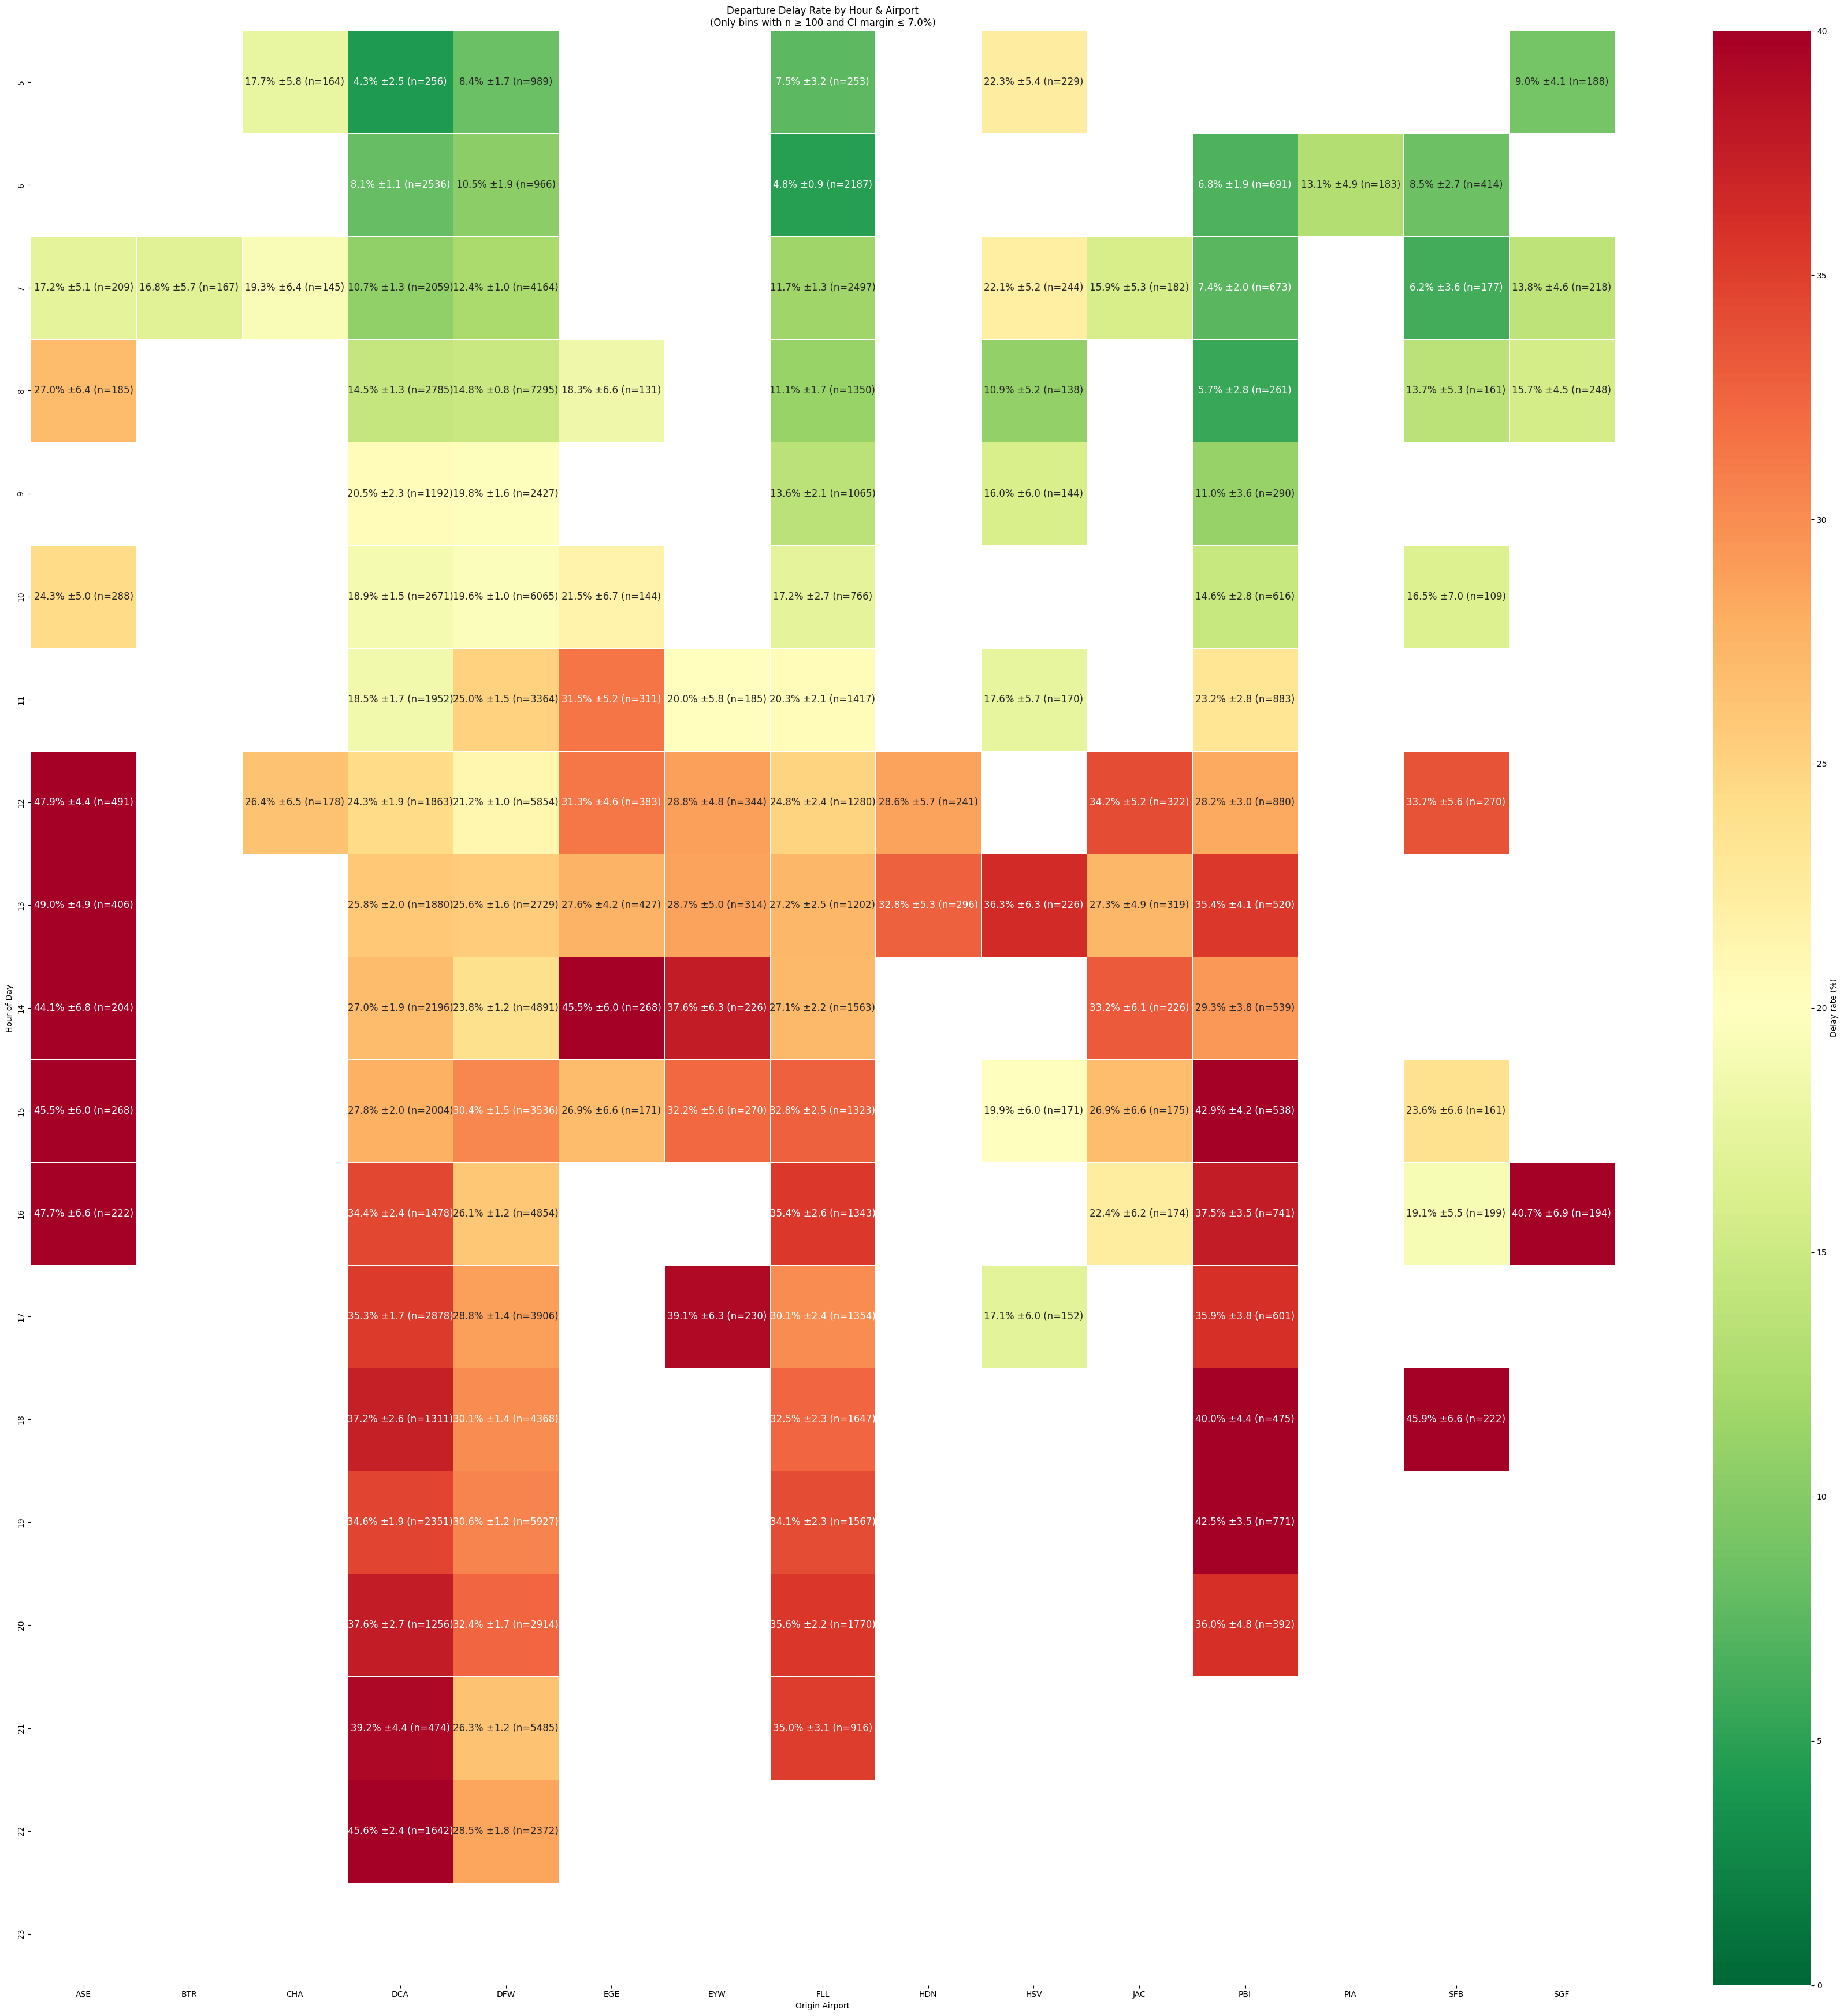

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(35, 35))

sns.heatmap(
    pivot_values,
    cmap="RdYlGn_r",      # green low → red high
    vmin=0,
    vmax=40,              # adjust if you have higher rates
    linewidths=0.5,
    annot=pivot_labels,
    fmt="",               # don't auto-format our labels
    cbar_kws={'label': 'Delay rate (%)'},
    annot_kws={"size": 12}
)

plt.title(
    "Departure Delay Rate by Hour & Airport\n"
    f"(Only bins with n ≥ {min_n} and CI margin ≤ {max_margin}%)"
)
plt.xlabel("Origin Airport")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()

To avoid misleading conclusions from small samples, I computed 95% confidence intervals for the delay rate at each airport-hour combination using a binomial proportion model. I then only visualized bins where:

*	the number of flights was at least 100, and
*	the 95% confidence interval half-width was at most 7 percentage points.

This ensures the highlighted hotspots reflect statistically stable delay patterns rather than random noise from low-volume time slots.

## Root-cause analysis of departure delays

In [71]:
df_delayed=df_operation[df_operation['dep_del15']==1]

In [72]:
df_delayed.columns

Index(['year', 'quarter', 'month', 'day', 'op_unique_carrier', 'op_carrier',
       'origin', 'origin_city_name', 'origin_state_abr', 'origin_state_nm',
       'dest', 'dest_city_name', 'dest_state_abr', 'dest_state_nm',
       'crs_dep_time', 'dep_time', 'dep_delay', 'dep_delay_new', 'dep_del15',
       'dep_delay_group', 'dep_time_blk', 'taxi_out', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'arr_delay_new', 'arr_del15',
       'arr_delay_group', 'arr_time_blk', 'cancelled', 'cancellation_code',
       'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time',
       'flights', 'distance', 'distance_group', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'flight_date', 'hour'],
      dtype='object')

In [73]:
len(df_delayed)

305554

In [74]:
cause=['carrier_delay','weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df_delayed[cause].isna().sum()

,0
carrier_delay,62807
weather_delay,62807
nas_delay,62807
security_delay,62807
late_aircraft_delay,62807


There are missing cancellation causes in this dataset. We need to remove them but let us find out which airport has most of them.

/tmp/ipython-input-3097002412.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delayed['has_cause'] = df_delayed[cause].notna().any(axis=1)


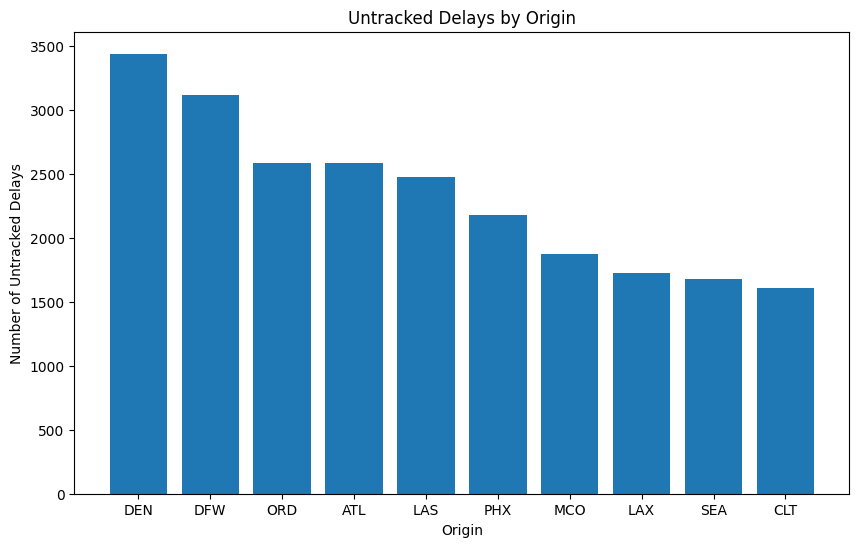

In [75]:
cause = ['carrier_delay','weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

df_delayed['has_cause'] = df_delayed[cause].notna().any(axis=1)
untracked_delays=df_delayed[df_delayed['has_cause']==False].groupby("origin")["has_cause"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.bar(untracked_delays.index,untracked_delays.values)
plt.xlabel("Origin")
plt.ylabel("Number of Untracked Delays")
plt.title("Untracked Delays by Origin")
plt.show()

Lets also find out which sirport has the most cancellations based on the total number of flights as well.

/tmp/ipython-input-101600429.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delayed['has_cause'] = df_delayed[cause].notna().any(axis=1)


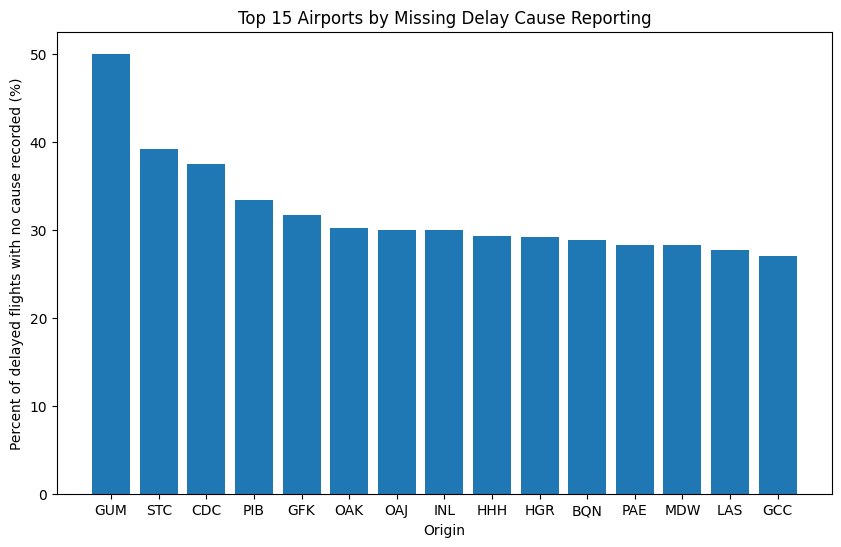

In [76]:
cause = ['carrier_delay','weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

df_delayed['has_cause'] = df_delayed[cause].notna().any(axis=1)
total_delays=df_delayed.groupby("origin").size().sort_values(ascending=False)
untracked_delays=df_delayed[df_delayed['has_cause']==False].groupby("origin")["has_cause"].count().sort_values(ascending=False)
percent_delays=((untracked_delays/total_delays)*100).sort_values(ascending=False).head(15)
plt.figure(figsize=(10,6))
plt.bar(percent_delays.index,percent_delays.values)
plt.xlabel("Origin")
plt.ylabel("Percent of delayed flights with no cause recorded (%)")
plt.title("Top 15 Airports by Missing Delay Cause Reporting")
plt.show()


Here is a report on it...

In [77]:
report = pd.DataFrame({
    "total_delays": total_delays,
    "untracked_delays": untracked_delays
})

report["percent_untracked"] = (report["untracked_delays"] / report["total_delays"]) * 100
report = report.sort_values("percent_untracked", ascending=False).head(15)
report

,total_delays,untracked_delays,percent_untracked
origin,,,
GUM,26,13.0,50.000000
STC,23,9.0,39.130435
CDC,16,6.0,37.500000
PIB,21,7.0,33.333333
GFK,41,13.0,31.707317
OAK,1255,379.0,30.199203
OAJ,20,6.0,30.000000
INL,20,6.0,30.000000
HHH,41,12.0,29.268293


In [78]:
df_delayed['has_cause'] = df_delayed[cause].notna().any(axis=1)
df_cause=df_delayed[df_delayed['has_cause']==True]

/tmp/ipython-input-3571488628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delayed['has_cause'] = df_delayed[cause].notna().any(axis=1)


Out of all recorded delay minutes across Jan–Mar 2025, the largest share came from late_aircraft_delay, accounting for 40% of total delay time

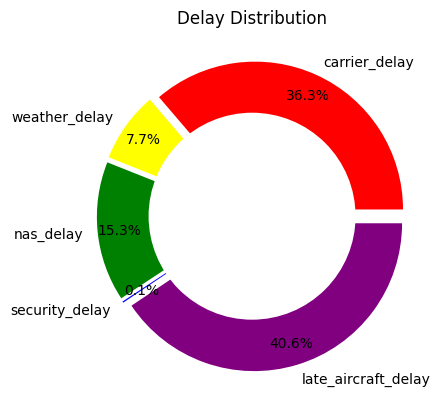

In [79]:
data=df_cause[cause].sum()/df_cause[cause].sum().sum() *100
plot_donut(data,labels=data.index,explode=(0.05,0.05,0.05,0.05,0.05),title="Delay Distribution",cols=["red","yellow","green","blue","purple"])


77% of all delay minutes are caused by internal factors — mainly aircraft turnaround and operational inefficiencies — not weather or infrastructure limitations.”

### Which airports suffer most from each primary delay cause?

In [80]:
df_root = df_operation.copy()
df_root = df_root[df_root['dep_del15'] == 1]
df_root = df_root.dropna(subset=cause, how='all')
df_cause=df_delayed[df_delayed['has_cause']==True]

mask_has_real_cause = (df_root[cause] > 0).any(axis=1)
df_root = df_root[mask_has_real_cause]
len(df_root),len(df_cause)

# 2.1 Sum delay minutes per airport by cause
airport_delay_matrix = df_root.groupby("origin")[cause].sum()

# 2.2 Convert each row to percentage composition
airport_delay_pct = (
    airport_delay_matrix.div(airport_delay_matrix.sum(axis=1), axis=0) * 100
)

# 2.3 Determine dominant cause per airport
airport_delay_pct["dominant_cause"] = airport_delay_pct[cause].idxmax(axis=1)

airport_delay_pct


,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dominant_cause
origin,,,,,,
ABE,39.576242,16.984343,17.060926,0.000000,26.378489,carrier_delay
ABI,29.341792,22.944753,5.656886,0.475813,41.580756,late_aircraft_delay
ABQ,34.229578,9.679444,15.732759,0.041848,40.316371,late_aircraft_delay
ABR,91.462491,4.546603,3.990907,0.000000,0.000000,carrier_delay
ABY,62.365001,36.371957,1.263042,0.000000,0.000000,carrier_delay
...,...,...,...,...,...,...
WRG,0.000000,0.000000,2.460850,0.000000,97.539150,late_aircraft_delay
XNA,25.644162,24.994486,11.820497,0.000000,37.540855,late_aircraft_delay
XWA,49.942947,14.579128,16.396033,0.465198,18.616694,carrier_delay


In [81]:
matB=df_cause.groupby("origin")[cause].sum().values
matC=matB/matB.sum(axis=1).reshape(-1,1) *100
airport_delay=pd.DataFrame(matC,index=df_cause.groupby("origin")[cause].sum().index,columns=cause)
airport_delay['dominant_cause']=pd.DataFrame(matC,index=df_cause.groupby("origin")[cause].sum().index,columns=cause).idxmax(axis=1)
n_flights = df_cause.groupby("origin").size()
records=[]
for airport in airport_delay.index:
    for c in cause:
        p = airport_delay.loc[airport, c] / 100   # convert % to 0–1
        n = n_flights[airport]

        # Standard Error
        se = (p * (1 - p) / n)**0.5

        # 95% confidence interval
        ci_low = p - 1.96 * se
        ci_high = p + 1.96 * se

        records.append({
            "origin": airport,
            "cause": c,
            "p_share": p * 100,        # back to percentage
            "n": n,
            "se": se,
            "ci_low": ci_low * 100,    # convert bounds to %
            "ci_high": ci_high * 100,
        })

ci_df = pd.DataFrame(records)
ci_df.head()

,origin,cause,p_share,n,se,ci_low,ci_high
0,ABE,carrier_delay,39.576242,91,0.051263,29.528777,49.623708
1,ABE,weather_delay,16.984343,91,0.039363,9.269275,24.699411
2,ABE,nas_delay,17.060926,91,0.039433,9.332051,24.789800
3,ABE,security_delay,0.000000,91,0.000000,0.000000,0.000000
4,ABE,late_aircraft_delay,26.378489,91,0.046196,17.324026,35.432952


In [82]:
airport_delay.head(10)

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,dominant_cause
origin,,,,,,
ABE,39.576242,16.984343,17.060926,0.000000,26.378489,carrier_delay
ABI,29.341792,22.944753,5.656886,0.475813,41.580756,late_aircraft_delay
ABQ,34.229578,9.679444,15.732759,0.041848,40.316371,late_aircraft_delay
ABR,91.462491,4.546603,3.990907,0.000000,0.000000,carrier_delay
ABY,62.365001,36.371957,1.263042,0.000000,0.000000,carrier_delay
ACT,68.529247,17.435993,3.401233,0.000000,10.633526,carrier_delay
ACV,41.408399,11.149826,28.589767,0.000000,18.852008,carrier_delay
ACY,16.172615,4.315386,51.683807,0.000000,27.828191,nas_delay
ADK,72.000000,0.000000,28.000000,0.000000,0.000000,carrier_delay


In [83]:
ci_df["ci_width"] = ci_df["ci_high"] - ci_df["ci_low"]

# 2) Filter to statistically reliable airport–cause pairs
MIN_N = 100          # you can adjust
MAX_WIDTH = 20       # 20 percentage points

ci_strong = ci_df[
    (ci_df["n"] >= MIN_N) &
    (ci_df["ci_width"] <= MAX_WIDTH)
].copy()


len(ci_strong.origin.unique()), len(ci_df.origin.unique())

(173, 332)

In [84]:
ci_strong.head()

,origin,cause,p_share,n,se,ci_low,ci_high,ci_width
10,ABQ,carrier_delay,34.229578,584,0.019634,30.381306,38.077850,7.696544
11,ABQ,weather_delay,9.679444,584,0.012235,7.281339,12.077549,4.796210
12,ABQ,nas_delay,15.732759,584,0.015067,12.779636,18.685881,5.906245
13,ABQ,security_delay,0.041848,584,0.000846,-0.124033,0.207729,0.331762
14,ABQ,late_aircraft_delay,40.316371,584,0.020298,36.337884,44.294858,7.956975


In [85]:
idx = ci_strong.groupby("origin")["p_share"].idxmax()
airport_dominant = ci_strong.loc[idx].copy()

airport_dominant=airport_dominant.sort_values("p_share",ascending=False)
airport_dominant

,origin,cause,p_share,n,se,ci_low,ci_high,ci_width
1270,PVU,carrier_delay,73.179052,116,0.041134,65.116778,81.241325,16.124547
674,HDN,late_aircraft_delay,66.975387,253,0.029568,61.180136,72.770639,11.590503
789,ITO,late_aircraft_delay,65.435510,124,0.042708,57.064708,73.806311,16.741603
1430,SGU,carrier_delay,64.922145,114,0.044695,56.161894,73.682397,17.520504
160,BIS,carrier_delay,61.630386,212,0.033398,55.084337,68.176436,13.092099
...,...,...,...,...,...,...,...,...
1275,PWM,carrier_delay,34.793274,212,0.032713,28.381444,41.205104,12.823660
69,AMA,late_aircraft_delay,34.641161,158,0.037855,27.221639,42.060683,14.839043
81,ASE,weather_delay,33.093525,877,0.015889,29.979215,36.207835,6.228620
1177,PGD,nas_delay,33.091794,450,0.022182,28.744193,37.439395,8.695202


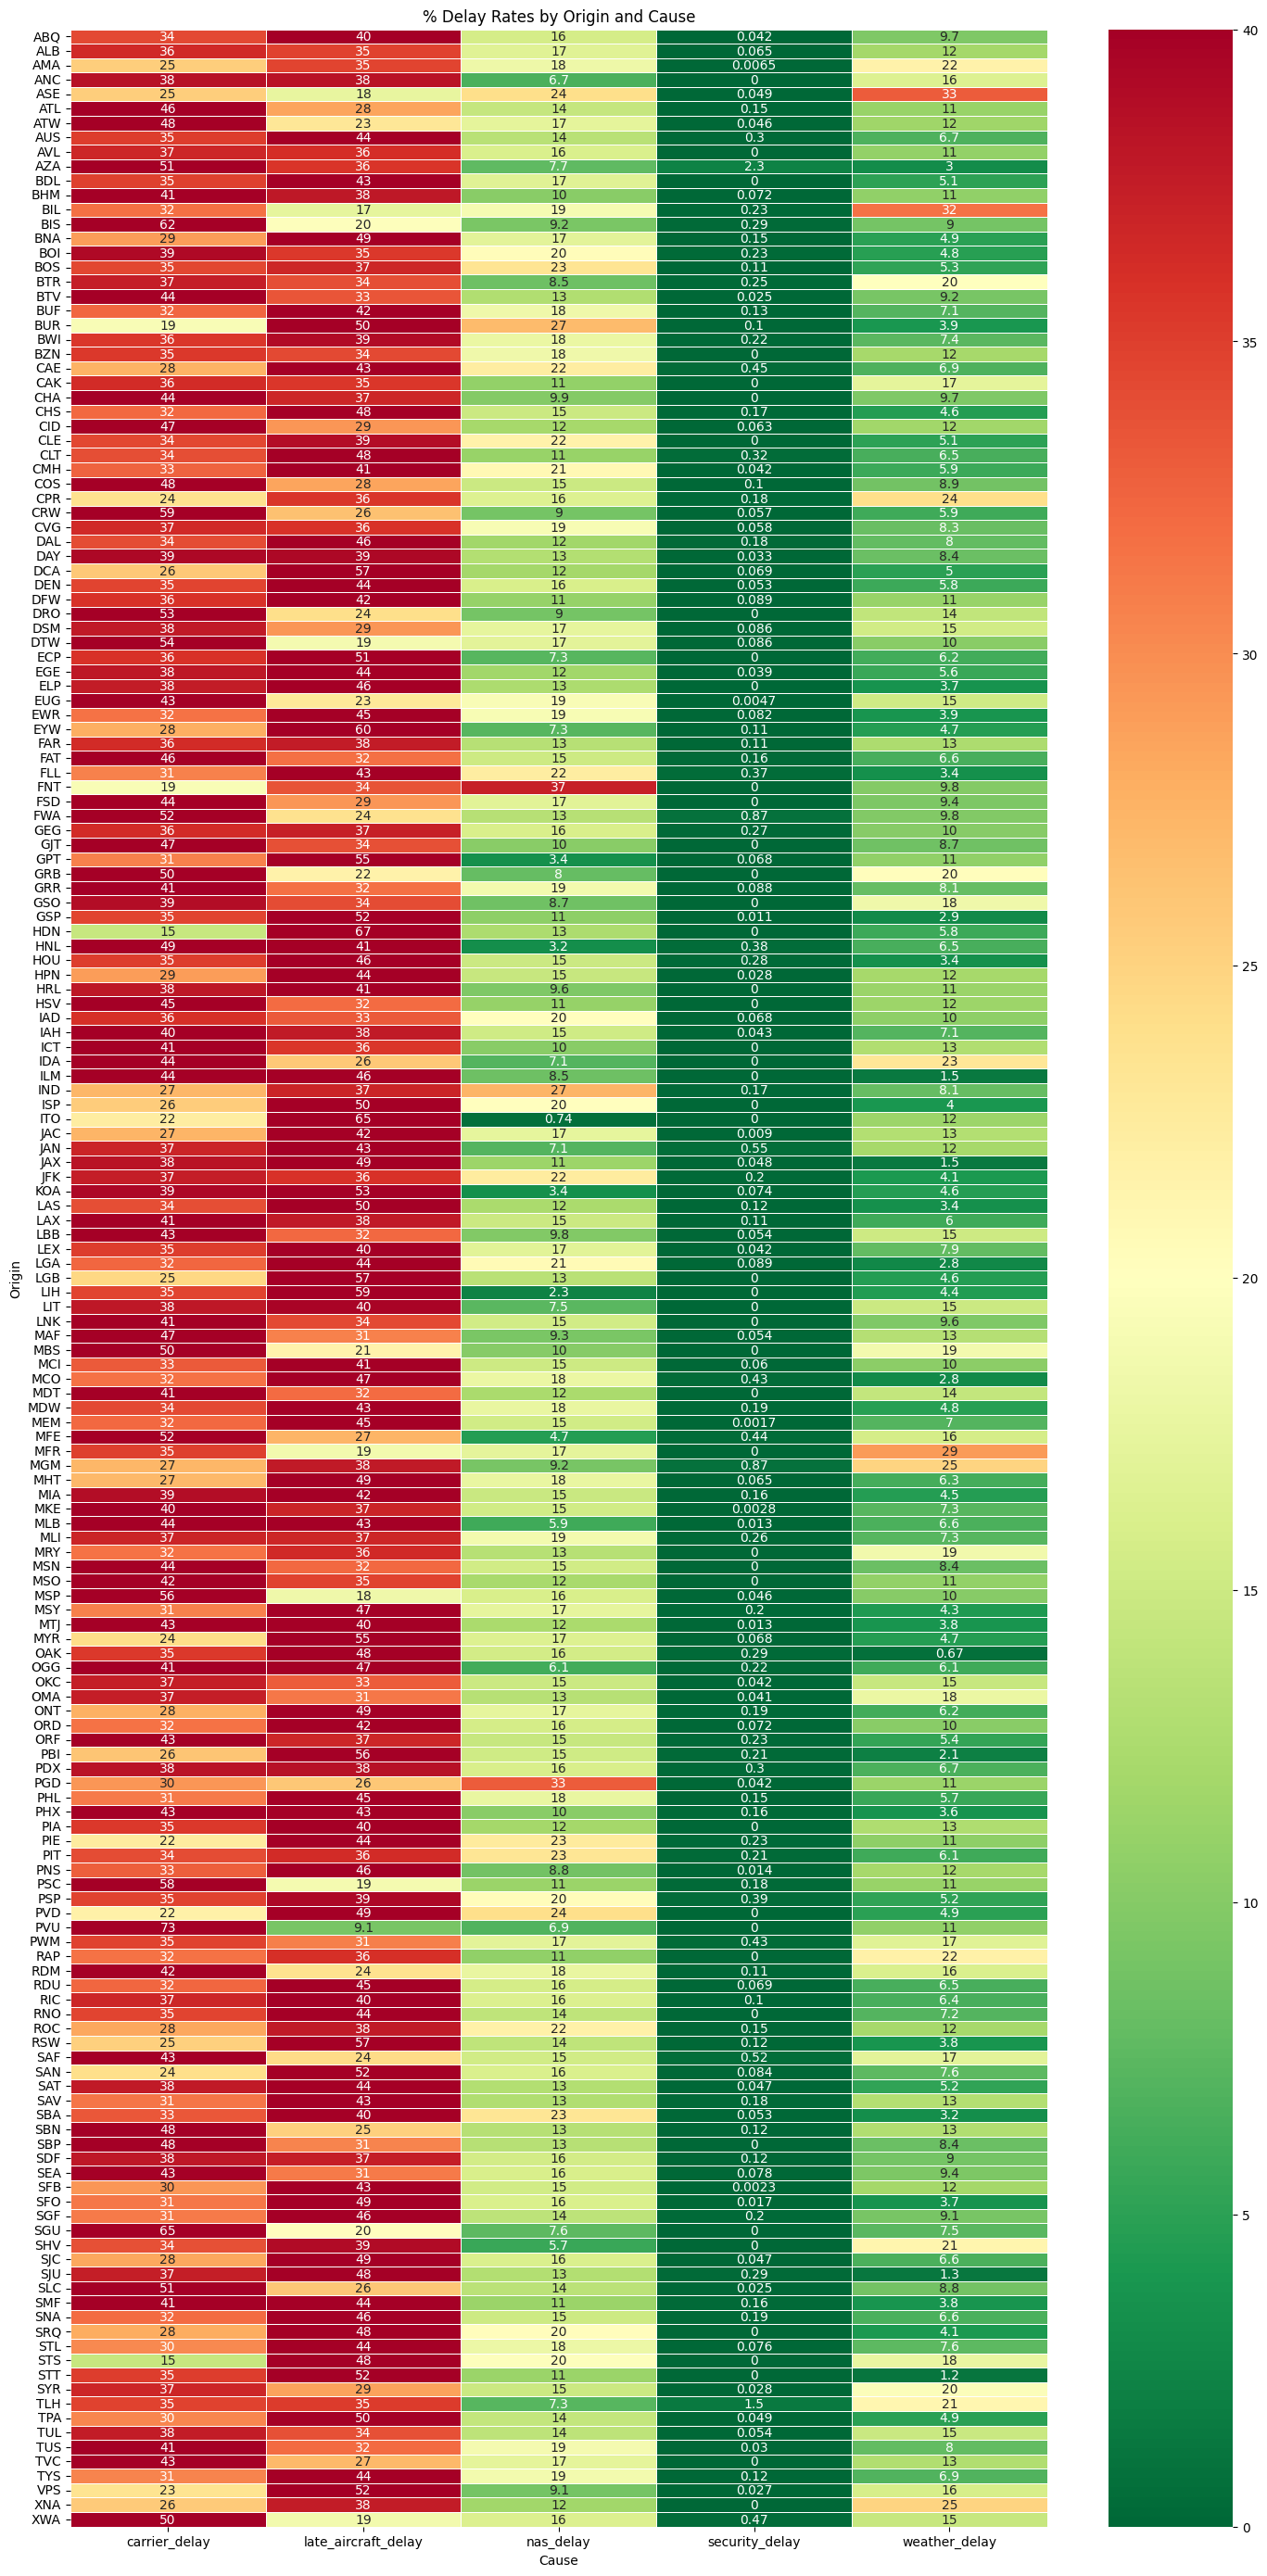

In [86]:
plt.figure(figsize=(17,35))
sns.heatmap(ci_strong.pivot(index='origin', columns='cause', values='p_share'),cmap="RdYlGn_r",vmin=0,vmax=40,linewidths=0.5,annot=True)
plt.title('% Delay Rates by Origin and Cause')
plt.xlabel('Cause')
plt.ylabel('Origin')
plt.show()


In [87]:
ci_strong

,origin,cause,p_share,n,se,ci_low,ci_high,ci_width
10,ABQ,carrier_delay,34.229578,584,0.019634,30.381306,38.077850,7.696544
11,ABQ,weather_delay,9.679444,584,0.012235,7.281339,12.077549,4.796210
12,ABQ,nas_delay,15.732759,584,0.015067,12.779636,18.685881,5.906245
13,ABQ,security_delay,0.041848,584,0.000846,-0.124033,0.207729,0.331762
14,ABQ,late_aircraft_delay,40.316371,584,0.020298,36.337884,44.294858,7.956975
...,...,...,...,...,...,...,...,...
1645,XWA,carrier_delay,49.942947,102,0.049507,40.239508,59.646387,19.406879
1646,XWA,weather_delay,14.579128,102,0.034942,7.730497,21.427758,13.697262
1647,XWA,nas_delay,16.396033,102,0.036659,9.210833,23.581232,14.370399
1648,XWA,security_delay,0.465198,102,0.006738,-0.855375,1.785771,2.641146


### Which airports experience each cause at rates above national norm?

In [88]:
national=df_delayed[cause].sum()/df_delayed[cause].sum().sum() *100

In [89]:
df_delayed[cause].sum().sum()

np.float64(20598822.0)

In [93]:
shares=df_delayed.groupby("origin")[cause].sum().div(df_delayed.groupby("origin")[cause].sum().sum(axis=1),axis=0) *100

airport_vs_national=shares-national

In [94]:
shares.loc[outliers.index]>20

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
origin,,,,,
AMA,True,True,False,False,True
ASE,True,True,True,False,False
ATL,True,False,False,False,True
ATW,True,False,False,False,True
AZA,True,False,False,False,True
...,...,...,...,...,...
TLH,True,True,False,False,True
TVC,True,False,False,False,True
VPS,True,False,False,False,True


In [92]:
approved_airports = ci_strong.origin.unique()

airport_vs_nat_filtered = airport_vs_national.loc[approved_airports]
big_deviation = (airport_vs_nat_filtered.abs() > 10).any(axis=1)
outliers = airport_vs_nat_filtered[big_deviation]
# Per-cell condition A: abs deviation > 10
dev_mask = airport_vs_nat_filtered.abs() > 10

# Per-cell condition B: share >= 20
share_mask = shares.loc[airport_vs_nat_filtered.index] >= 20

# Combine both
final_mask = dev_mask & share_mask

# Apply
serious_outliers = airport_vs_nat_filtered.where(final_mask).dropna(how="all")

In [95]:
serious_outliers

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
origin,,,,,
AMA,-10.887263,13.982121,NaN,NaN,NaN
ASE,-10.897895,25.382628,NaN,NaN,NaN
ATL,NaN,NaN,NaN,NaN,-12.113699
ATW,11.647077,NaN,NaN,NaN,-17.510518
AZA,15.104865,NaN,NaN,NaN,NaN
...,...,...,...,...,...
TLH,NaN,13.487427,NaN,NaN,NaN
TVC,NaN,NaN,NaN,NaN,-13.503965
VPS,-12.830285,NaN,NaN,NaN,11.047581


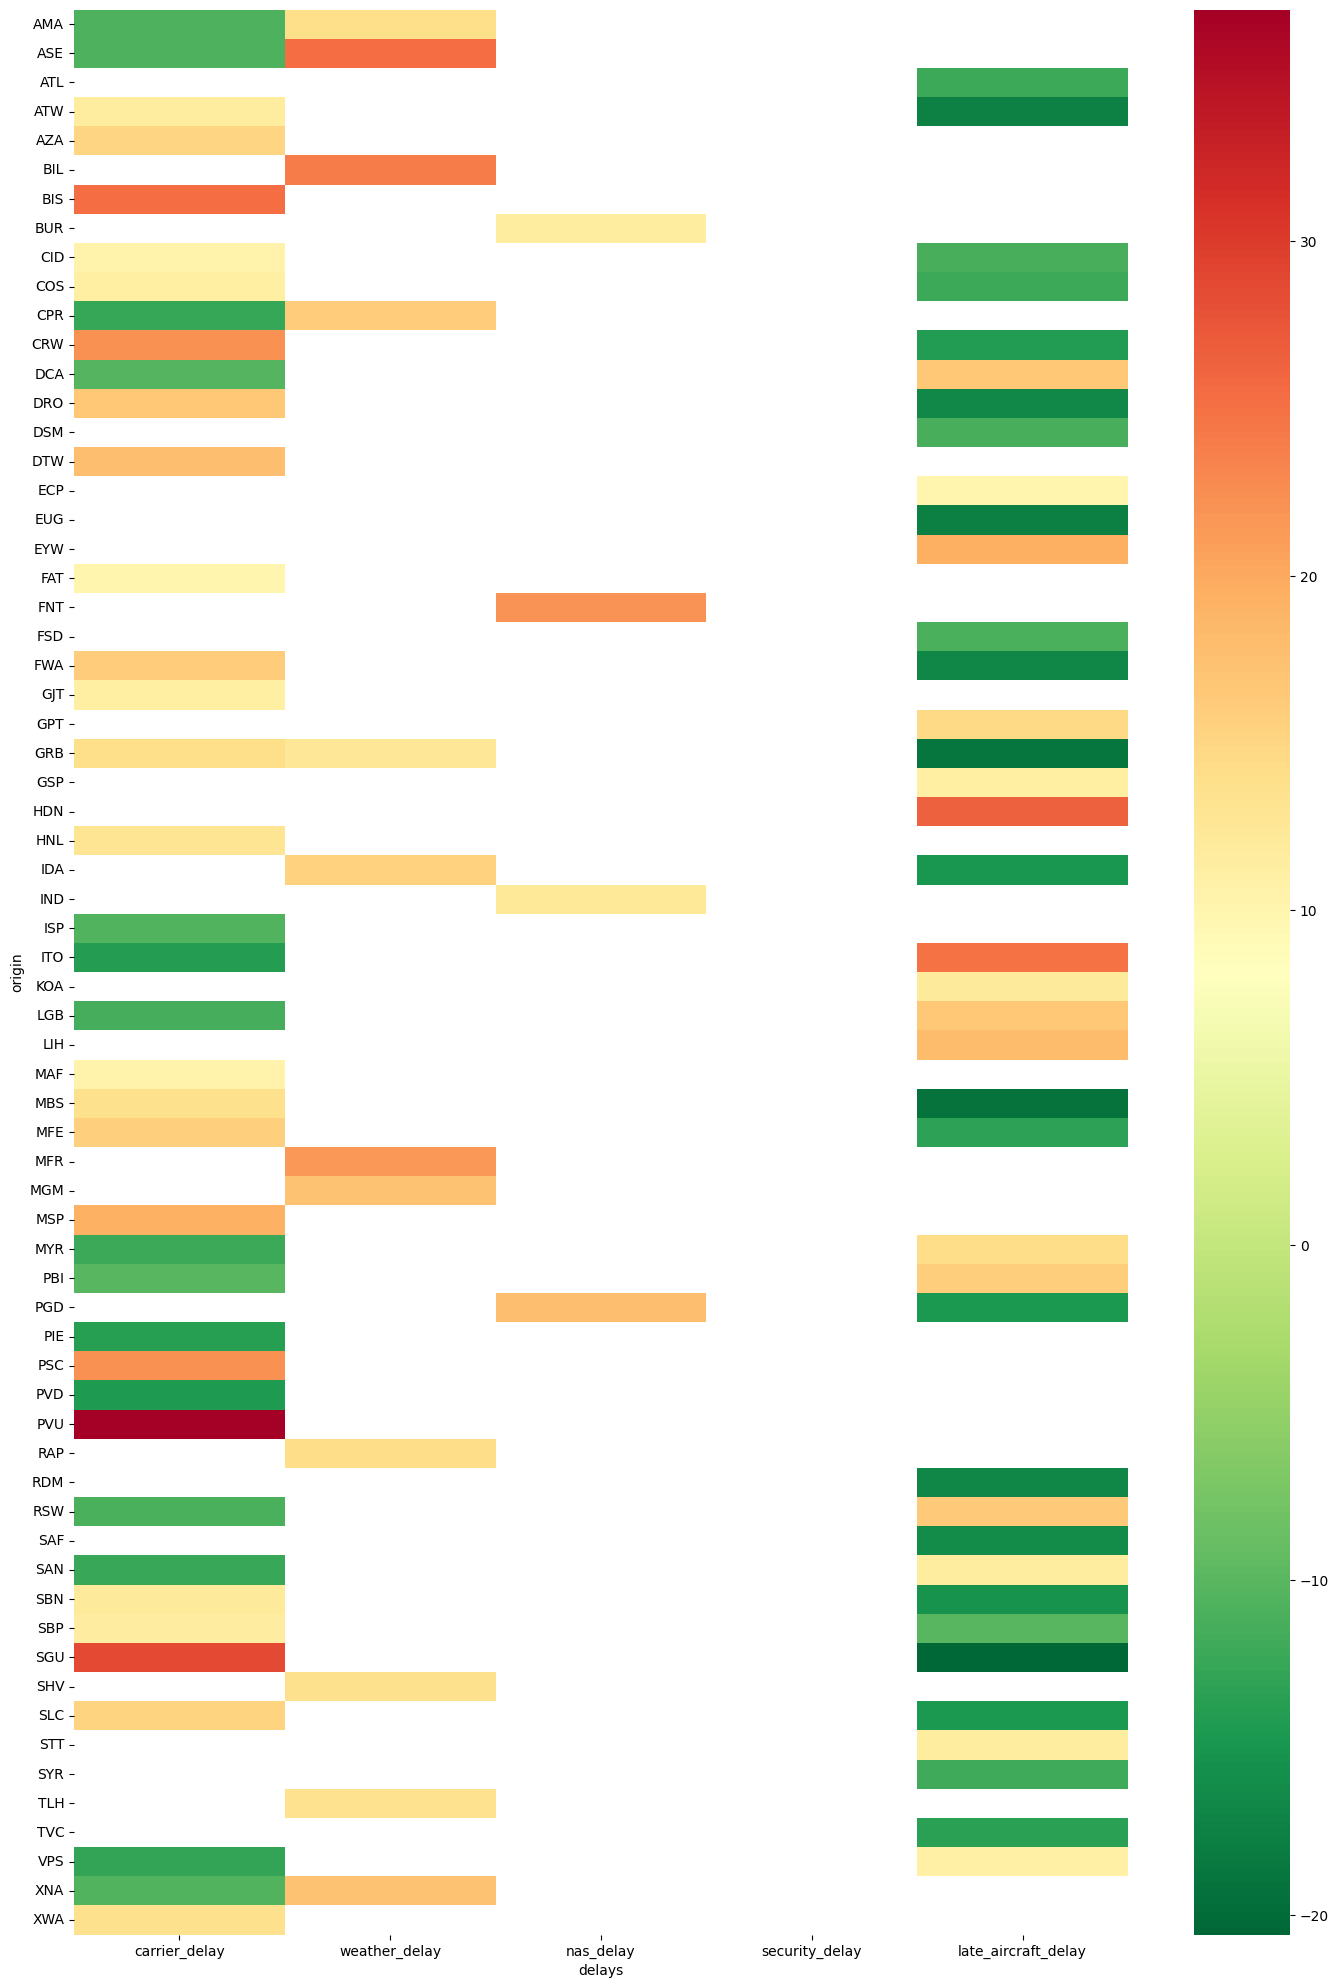

In [96]:
plt.figure(figsize=(17,25))
sns.heatmap(serious_outliers,cmap="RdYlGn_r")
plt.xlabel("delays")
plt.ylabel("origin")
plt.show()

#### Across the whole network, which carriers have the highest % of delayed departures?

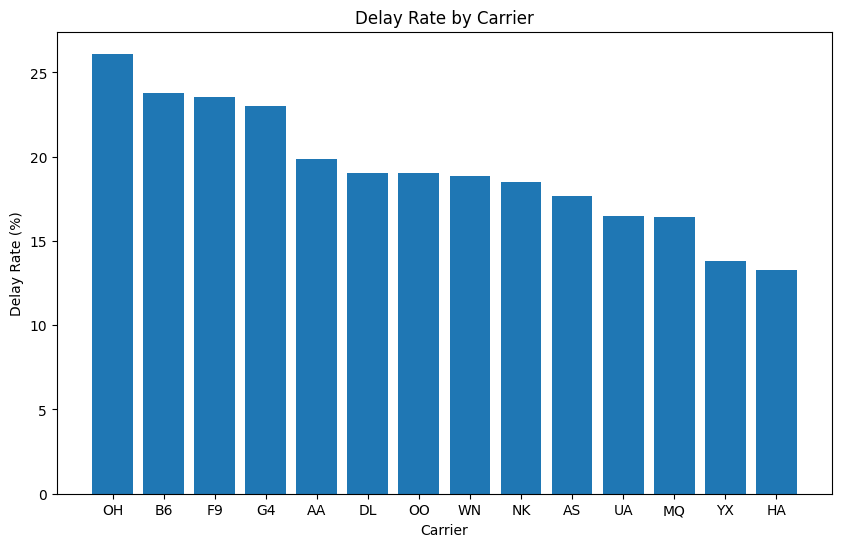

In [115]:
rates=df_operation.groupby('op_carrier')['dep_del15'].mean() * 100
rates=rates.sort_values(ascending=False)
plt.figure(figsize=(10,6))
plt.bar(rates.index,rates.values)
plt.xticks(rates.index)
plt.xlabel("Carrier")
plt.ylabel("Delay Rate (%)")
plt.title("Delay Rate by Carrier")
plt.show()

In [203]:
per_origin_rate=df_operation.groupby(['op_carrier','origin'])["dep_del15"].mean() *100
global_delay_rates = df_operation.groupby('op_carrier')['dep_del15'].mean() * 100
excess_delay=per_origin_rate.sub(global_delay_rates, level=0)
excess_delay=excess_delay.reset_index()
per_origin_rate=per_origin_rate.reset_index()
per_origin_rate = per_origin_rate.reset_index().rename(columns={"dep_del15":"origin_delay_rate"})
excess_delay=excess_delay.rename(columns={"dep_del15":"excess_del"})
combined_rates=pd.merge(per_origin_rate,excess_delay,how="left",on=["op_carrier","origin"])
size=df_operation.groupby(['op_carrier','origin'])["dep_del15"].size()
size=size.reset_index()
size=size.rename(columns={"dep_del15":"num_flights"})
combined_rates=pd.merge(combined_rates,size,how="left",on=["op_carrier","origin"])
combined_rates.head(10)


,index,op_carrier,origin,origin_delay_rate,excess_del,num_flights
0,0,AA,ABQ,15.813953,-4.071778,645
1,1,AA,ALB,17.253521,-2.632210,284
2,2,AA,AMA,20.000000,0.114269,5
3,3,AA,ANC,35.483871,15.598140,31
4,4,AA,ATL,16.563147,-3.322584,1449
5,5,AA,AUS,15.151515,-4.734216,2772
6,6,AA,AVP,20.800000,0.914269,125
7,7,AA,BDL,13.388626,-6.497106,844
8,8,AA,BFL,12.578616,-7.307115,159
9,9,AA,BHM,28.136882,8.251151,263


In [209]:
median=combined_rates['num_flights'].median()
useful=combined_rates[(combined_rates['num_flights']>=median) & (combined_rates['excess_del']>=5)].copy()
useful['severity_score']= useful['excess_del'].mul(useful['num_flights'])
useful

,index,op_carrier,origin,origin_delay_rate,excess_del,num_flights,severity_score
28,28,AA,DFW,27.341505,7.455774,37935,282834.783921
32,32,AA,EGE,35.207101,15.321369,676,10357.245655
36,36,AA,EYW,35.317460,15.431729,504,7777.591435
82,82,AA,PBI,24.888143,5.002412,1788,8944.312473
87,87,AA,PNS,25.783972,5.898241,287,1692.795123
...,...,...,...,...,...,...,...
1323,1323,WN,DCA,24.614567,5.737686,3762,21585.174628
1324,1324,WN,DEN,26.388291,7.511410,20907,157041.054210
1331,1331,WN,FLL,24.095296,5.218415,3316,17304.263441
1393,1393,WN,SFO,27.484384,8.607503,1761,15157.813003
